<a href="https://colab.research.google.com/github/yakaboskic/ENGS_108_Fall_2020/blob/master/solutions/assignment_7_ENGS_108_2020_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENGS 108 Fall 2020 Assignment 7 Solutions**

*Due November 18, 2020 at 11:59PM on Canvas*

**Instructors:** George Cybenko

**TAs:** Chase Yakaboski


---

## **Rules and Requirements**


1.   You are only allowed to use Python packages that are explicity imported in 
the assignment notebook or are standard (bultin) python libraries like random, os, sys, etc, (Standard Bultin Python libraries will have a Python.org documentation). For this assignment you may use:
  *   [numpy](https://numpy.org/doc/stable/)
  *   [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)
  *   [scikit-learn](https://scikit-learn.org/stable/)
  *   [matplotlib](https://matplotlib.org/)
  *   [tensorflow](https://www.tensorflow.org/)

2.   All code must be fit into the designated code or text blocks in the assignment notebook. They are indentified by a **TODO** qualifier.

3. For analytical questions that don't require code, type your answer cleanly in Markdown. For help, see the [Google Colab Markdown Guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb).

---

In [1]:
'''Import Statements'''
import tensorflow as tf
import numpy as np
import tqdm.notebook as tq
import os
import PIL
from tensorflow.keras import layers
import time
import matplotlib.pyplot as plt

## **Problem 1: MNIST GANs**
Use the MNIST dataset to train 10 Generative Adversarial Networks to create hand writtencharacters using the MNIST samples. You can build on the Matlab example or use any othercode as a starting point. Submit your code for the GAN you used.

> **Part 1** Load in the MNIST dataset and seperate the dataset into 10 seperate datasets for each number class, i.e. 0, 1, 2, ..., 9.

In [2]:
# Load data
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

#TODO: Seperate the training data using the train labels into 10 seperate datasets.

#TODO: Then build a TF dataset for each of the seperated out numpy datasets.

In [3]:
#-- Seperate datasets
train_split = [[] for _ in range(10)]
for image, label in zip(train_images, train_labels):
  train_split[label].append(image)

#-- Convert datasets to a nice format
np_datasets = []
for data in train_split:
  data = np.array(data)
  data = data.reshape(data.shape[0], 28, 28, 1).astype('float32')
  # Optional normalization
  data = (data - 127.5) / 127.5
  np_datasets.append(data)

BATCH_SIZE = 256

#-- Build TF datasets for each. Batch size is the number of training examples for each number.
tf_datasets = []
for data in np_datasets:
  data = tf.data.Dataset.from_tensor_slices(data).shuffle(data.shape[0]).batch(BATCH_SIZE)
  tf_datasets.append(data)

> **Part 2** Make the generator and the discriminator of the GAN. Feel free to use [this tutorial](https://www.tensorflow.org/tutorials/generative/dcgan) for building the generator and discriminator. Maybe change the architecture a little bit tho so it's not just straight plagiarism.  

In [ ]:
#TODO: Build a function that builds the generator network.
def make_generator_model():
  return model
#TODO: Build a function that builds the discriminator network.
def make_discriminator_model():
  return model

In [4]:
# Take from the mentioned tutorial, students should have changed the architectures a little.
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

> **Part 3** Define your loss functions for the models. 

In [ ]:
#TODO: Make your generator and discriminiator loss functions and assign a optimizer for your generator and discriminator.
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
  return loss

def generator_loss(fake_output):
  return loss

In [10]:
# Taken from mentioned tutorial
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

> **Part 4** Using the training step function provided build a training loop and train 10 GANs using your 10 datasets so that each GAN is trained on a seperate dataset. After training, you should have 10 GANs, where each GAN will generate one respective number, i.e. 0, 1, 2, ..., 9. **Make sure to enable GPU acceleration for faster training. Go to *Edit > Notebook Settings > Hardware Accelerator* and click GPU.** *Note: You'll have to rerun your notebook after you do this.*

In [6]:
# Some code to help save checkpoints in case your notebook crashes
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

In [7]:
# Provided training step function taken from cited tutorial but modified a little. Pay attention to the modification!
noise_dim = 100

def train_step_fn():
  @tf.function
  def train_step(images, generator, discriminator, generator_optimizer, discriminator_optimizer):
      noise = tf.random.normal([BATCH_SIZE, noise_dim])

      with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

      gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
      gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

      generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
      discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
  return train_step

In [ ]:
#TODO: Finish implementing this train function. It doesn't have to return anything
def train(dataset, epochs, generator, discriminator, generator_optimizer, discriminator_optimizer):
  pass

In [ ]:
#TODO: Finish the training loop.
EPOCHS = 50
gans = []

for dataset in tf_datasets:
  #TODO: Define your optimizers, i.e. change the Nones to something.
  generator_optimizer = None
  discriminator_optimizer = None
  # Instaniate your models
  gen = make_generator_model()
  discrim = make_discriminator_model()
  # Reinitialize the train_step function
  train_step_fn()
  # Put in your checkoutpoint for each gan
  checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=gen,
                                 discriminator=discrim)
  # Train the model
  train(dataset, EPOCHS, gen, discrim, generator_optimizer, discriminator_optimizer)
  # Save the generator in the gans list
  gans.append(gen)

In [8]:
def train(dataset, epochs, generator, discriminator, generator_optimizer, discriminator_optimizer, checkpoint):
  for epoch in tq.tqdm(range(epochs), desc='Completed Epochs'):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch, generator, discriminator, generator_optimizer, discriminator_optimizer)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    #print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

In [11]:
#TODO: Finish the training loop.
EPOCHS = 50
gans = []

for dataset in tf_datasets:
  #TODO: Define your optimizers, i.e. change the Nones to something.
  generator_optimizer = tf.keras.optimizers.Adam(1e-4)
  discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)
  # Instaniate your models
  gen = make_generator_model()
  discrim = make_discriminator_model()
  # Reinitialize the train_step function
  train_step = train_step_fn()
  # Put in your checkoutpoint for each gan
  checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=gen,
                                 discriminator=discrim)
  # Train the model
  train(dataset, EPOCHS, gen, discrim, generator_optimizer, discriminator_optimizer, checkpoint)
  # Save the generator in the gans list
  gans.append(gen)

> **Part 5** Using a random seed as the generator input, plot the generated number from each of the ten GANs. Use the same seed for each GAN.

In [ ]:
#TODO: Initialize a random seed as input into each gan.

#TODO: Go through each GAN, output the result using the seed and plot the result.

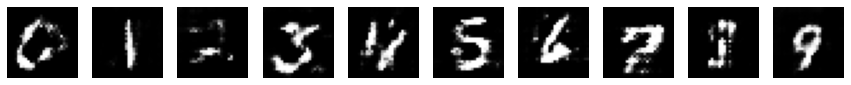

In [12]:
seed = tf.random.normal([1, noise_dim])
fig = plt.figure(figsize=(15,15))
for i, gan in enumerate(gans):
  prediction = gan(seed, training=False)
  plt.subplot(1,10,i+1)
  plt.imshow(prediction[0, :, :, 0] * 127.5 + 127.5, cmap='gray')
  plt.axis('off')
plt.show()

## **Problem 2: MNIST RCO**
Use the 10 trained generators to create the following application which we will call RCO(reverse of OCR).
* Your RCO will read a string of digits and will output the corresponding GAN generated samples of handwritten digits as a single png image of the string of digits.

In [ ]:
#TODO: Implement the following function
def rco(string_of_numbers):
  generated_numbers = []
  for num in string_of_numbers:
    #TODO: Convert the number to an int
    #TODO: Index your trained GANs list with that int
    #TODO: Generate a image using your seed from Part 5. 
    #TODO: Append that img to generated_numbers list

  #TODO: Now go through your generated numbers a create a matplotlib plot of all the numbers in the string.
  # Maybe increase figure size if too small.
  fig = plt.figure(15, 15)
  for i, gen_num in enumerate(generated_numbers):
    plt.subplot(1, len(generated_numbers), i+1)
    #TODO: Implement the image show.
    plt.imshow()
    #TODO: Maybe turn off the axis
  plt.show()

In [13]:
#TODO: Implement the following function
def rco(string_of_numbers):
  generated_numbers = []
  for num in string_of_numbers:
    generated_numbers.append(gans[int(num)](seed, training=False))


  #TODO: Now go through your generated numbers a create a matplotlib plot of all the numbers in the string.
  # Maybe increase figure size if too small.
  fig = plt.figure(figsize=(15,15))
  for i, gen_num in enumerate(generated_numbers):
    plt.subplot(1, len(generated_numbers), i+1)
    plt.imshow(gen_num[0,:,:,0] * 127.5 + 127.5, cmap='gray')
    plt.axis('off')
  plt.show()

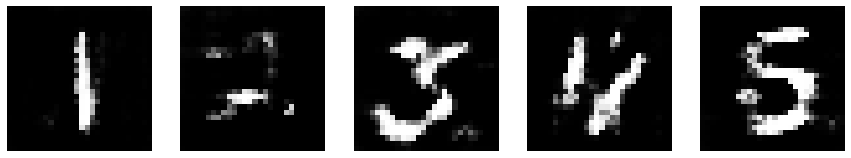

In [14]:
rco('12345')